# Test Model

In [34]:
import pandas as pd
from pandas import read_parquet

import geopandas as gpd
from shapely import wkt

from shapely.geometry import Point

import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor

import ast

In [35]:
df = pd.read_parquet("data_for_model")

In [36]:
df.head()

,datetime,station id,bike_busyness,Taxi_Zone_ID,taxi_busyness,SegmentID,volume_busyness
0,2018-10-14 15:15:00,3472,0.182482,68,0.210904,24244,0.011254
1,2018-10-14 15:15:00,3472,0.182482,68,0.210904,-31883,0.009149
2,2018-10-14 15:15:00,3472,0.182482,68,0.210904,24244,0.011254
3,2018-10-14 15:15:00,3472,0.182482,68,0.210904,-31883,0.009149
4,2018-10-14 15:15:00,3472,0.182482,68,0.210904,24244,0.011254


In [37]:
df['average_busyness'] = df[['bike_busyness', 'taxi_busyness', 'volume_busyness']].mean(axis=1)

"""
df = df.rename(columns={
    'busyness_x': 'bike_busyness',
    'busyness_y': 'taxi_busyness',
    'busyness': 'volume_busyness'
})
"""

"\ndf = df.rename(columns={\n    'busyness_x': 'bike_busyness',\n    'busyness_y': 'taxi_busyness',\n    'busyness': 'volume_busyness'\n})\n"

In [38]:
# Trasnform datetime
def transform_datetime(df):
    df['datetime'] = pd.to_datetime(df['datetime'])

    # Create a new column 'weekday' that is the day of the week (0=Monday, 6=Sunday)
    df['weekday'] = df['datetime'].dt.weekday
    df['month'] = df['datetime'].dt.month

    # Create a new column 'minute_of_day' that is the minute of the day in steps of 15 min
    df['time_of_day'] = (df['datetime'].dt.hour * 60 + df['datetime'].dt.minute) / 15

    df['time_of_week'] = (df['datetime'].dt.hour * 60 + df['datetime'].dt.minute) / 15 + 96 * df['weekday']
    return df

df = transform_datetime(df)
df.head()

,datetime,station id,bike_busyness,Taxi_Zone_ID,taxi_busyness,SegmentID,volume_busyness,average_busyness,weekday,month,time_of_day,time_of_week
0,2018-10-14 15:15:00,3472,0.182482,68,0.210904,24244,0.011254,0.134880,6,10,61.0,637.0
1,2018-10-14 15:15:00,3472,0.182482,68,0.210904,-31883,0.009149,0.134178,6,10,61.0,637.0
2,2018-10-14 15:15:00,3472,0.182482,68,0.210904,24244,0.011254,0.134880,6,10,61.0,637.0
3,2018-10-14 15:15:00,3472,0.182482,68,0.210904,-31883,0.009149,0.134178,6,10,61.0,637.0
4,2018-10-14 15:15:00,3472,0.182482,68,0.210904,24244,0.011254,0.134880,6,10,61.0,637.0


In [39]:
# Plot column 'average_busyness' against 'time_of_week'
plt.figure(figsize=(15, 6))
#plt.plot(df['time_of_day'], df['average_busyness'], 'o', markersize=3, color='red')
#plt.plot(df['time_of_day'], df['bike_busyness'], 'o', markersize=3, color='blue')
plt.plot(df['time_of_day'], df['taxi_busyness'], 'o', markersize=3, color='green')
#plt.plot(df['time_of_day'], df['volume_busyness'], 'o', markersize=3, color='yellow')
plt.xlabel('time_of_day')
plt.ylabel('average_busyness')
plt.title('Plot of busyness against time_of_day')
plt.grid(True)
plt.show()

KeyboardInterrupt: 

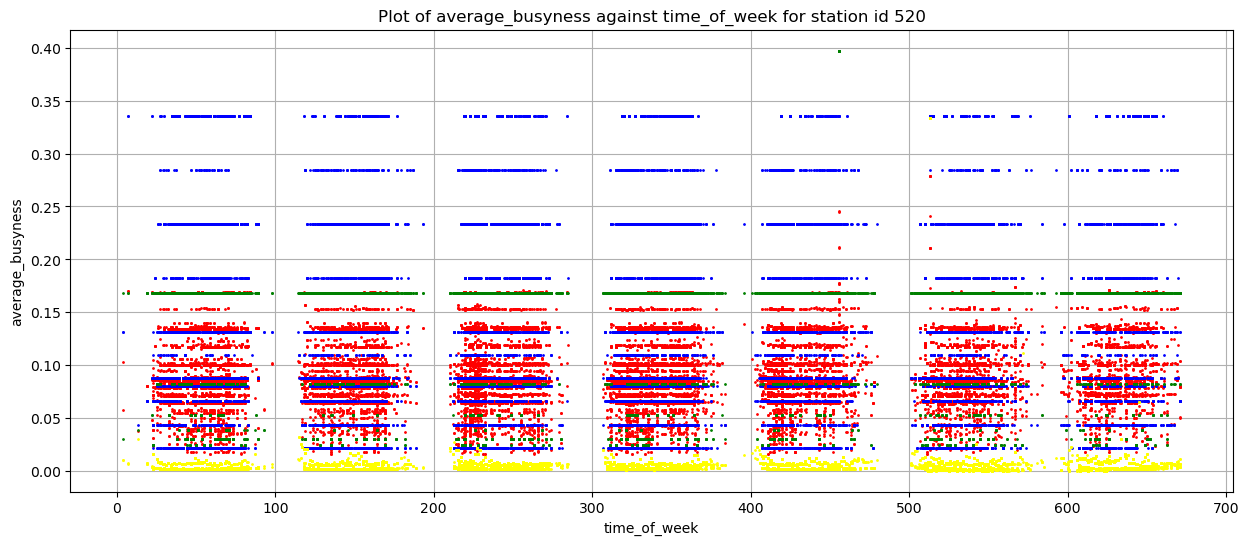

In [ ]:
# Filter the dataframe
df_520 = df.loc[df['Taxi_Zone_ID'] == 161]

# Plot column 'average_busyness' against 'time_of_week'
plt.figure(figsize=(15, 6))
plt.plot(df_520['time_of_week'], df_520['average_busyness'], 'o', markersize=1, color='red')
plt.plot(df_520['time_of_week'], df_520['bike_busyness'], 'o', markersize=1, color='blue')
plt.plot(df_520['time_of_week'], df_520['taxi_busyness'], 'o', markersize=1, color='green')
plt.plot(df_520['time_of_week'], df_520['volume_busyness'], 'o', markersize=1, color='yellow')
plt.xlabel('time_of_week')
plt.ylabel('average_busyness')
plt.title('Plot of average_busyness against time_of_week for station id 520')
plt.grid(True)
plt.show()

In [ ]:
df_520["taxi_busyness"].max()

df_520["taxi_busyness"] = df_520["taxi_busyness"] / 3.7799999999999994

/var/folders/ly/rt519r9j7sx5syy44_l85hz80000gn/T/ipykernel_2002/3517399917.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_520["taxi_busyness"] = df_520["taxi_busyness"] / 3.7799999999999994


In [ ]:
df_520["taxi_busyness"].max()

0.1051369057107938

#### Dummy Data

In [ ]:
df_contribution = pd.read_parquet("contribution_cal")
df_contribution.head()

,datetime,station id,bike_busyness,Taxi_Zone_ID,taxi_busyness,SegmentID,volume_busyness,temp,humidity,snow,windspeed,cloudcover,solarenergy
28696,2018-04-17 16:30:00,127,0.080292,158,0.340029,-32449,0.052526,8.2,33.95,0.0,11.5,50.6,0.9
28697,2018-04-17 16:30:00,127,0.080292,158,0.340029,31677,0.007523,8.2,33.95,0.0,11.5,50.6,0.9
28700,2018-04-17 16:30:00,358,0.029197,158,0.340029,-32449,0.052526,8.2,33.95,0.0,11.5,50.6,0.9
28701,2018-04-17 16:30:00,358,0.029197,158,0.340029,31677,0.007523,8.2,33.95,0.0,11.5,50.6,0.9
28704,2018-04-17 16:30:00,358,0.000000,158,0.340029,-32449,0.052526,8.2,33.95,0.0,11.5,50.6,0.9


In [ ]:
df_contribution = transform_datetime(df_contribution)
df_contribution["Taxi_Zone_ID"] = df_contribution["Taxi_Zone_ID"].apply(str)
df_contribution.head()

,datetime,station id,bike_busyness,Taxi_Zone_ID,taxi_busyness,SegmentID,volume_busyness,temp,humidity,snow,windspeed,cloudcover,solarenergy,weekday,month,time_of_day,time_of_week
28696,2018-04-17 16:30:00,127,0.080292,158,0.340029,-32449,0.052526,8.2,33.95,0.0,11.5,50.6,0.9,1,4,66.0,162.0
28697,2018-04-17 16:30:00,127,0.080292,158,0.340029,31677,0.007523,8.2,33.95,0.0,11.5,50.6,0.9,1,4,66.0,162.0
28700,2018-04-17 16:30:00,358,0.029197,158,0.340029,-32449,0.052526,8.2,33.95,0.0,11.5,50.6,0.9,1,4,66.0,162.0
28701,2018-04-17 16:30:00,358,0.029197,158,0.340029,31677,0.007523,8.2,33.95,0.0,11.5,50.6,0.9,1,4,66.0,162.0
28704,2018-04-17 16:30:00,358,0.000000,158,0.340029,-32449,0.052526,8.2,33.95,0.0,11.5,50.6,0.9,1,4,66.0,162.0


In [ ]:
df_zone = df_contribution.loc[df_contribution["Taxi_Zone_ID"] == "170"]
correlation = df_zone.corr()['bike_busyness']
print(correlation)

datetime          -0.000161
station id         0.519729
bike_busyness      1.000000
Taxi_Zone_ID            NaN
taxi_busyness      0.002530
SegmentID         -0.000095
volume_busyness    0.001976
temp               0.005153
humidity          -0.001519
snow              -0.010566
windspeed          0.006099
cloudcover         0.000965
solarenergy       -0.004883
weekday            0.005312
month             -0.002191
time_of_day        0.030248
time_of_week       0.008438
Name: bike_busyness, dtype: float64


In [ ]:
dummy_df = pd.read_csv('dummy_data.csv')

In [ ]:
taxi_zone = list(df_contribution["Taxi_Zone_ID"].unique())
#taxi_zone = [str(x) for x in taxi_zone] 
print(taxi_zone)

['158', '170', '232', '45', '246', '137', '48', '140', '50', '125', '261', '209']


In [ ]:
input_df = df_contribution

taxi_zone = list(input_df["Taxi_Zone_ID"].unique())
prediction_models = {}

for zone in taxi_zone:
        df_zone = input_df.loc[df_contribution["Taxi_Zone_ID"] == zone]
        X = df_zone.drop(['Taxi_Zone_ID', 'taxi_busyness', 'bike_busyness', 'volume_busyness', 'datetime', 'time_of_week'],axis=1)
        y_taxi = df_zone['taxi_busyness']
        y_bike = df_zone['bike_busyness']
        y_volume = df_zone['volume_busyness']
        
        regr_taxi = RandomForestRegressor(n_estimators = 10, random_state = 42)
        regr_taxi.fit(X, y_taxi)

        regr_bike = RandomForestRegressor(n_estimators = 10, random_state = 42)
        regr_bike.fit(X, y_bike)

        regr_volume = RandomForestRegressor(n_estimators = 10, random_state = 42)
        regr_volume.fit(X, y_volume)

        prediction_models[zone] = [regr_taxi.predict, regr_bike.predict, regr_volume.predict]

In [ ]:
input_df = df_contribution

taxi_zone = list(input_df["Taxi_Zone_ID"].unique())
prediction_models = {}

for zone in taxi_zone:
        df_zone = input_df.loc[df_contribution["Taxi_Zone_ID"] == zone]
        X = df_zone.drop(['Taxi_Zone_ID', 'taxi_busyness', 'bike_busyness', 'volume_busyness', 'datetime', 'time_of_week'],axis=1)
        y = df_zone['taxi_busyness']
        
        regr = RandomForestRegressor(n_estimators = 10, random_state = 42)
        regr.fit(X, y)

        prediction_models[zone] = regr.predict

## Factor for street "highway"

In [43]:
def safe_loads(row):
    try:
        return wkt.loads(row)
    except Exception:
        print(f"Error parsing row: {row}")
        return None  # or some other value

In [44]:
street_zones = pd.read_parquet("street_zones.parquet")

In [45]:
street_zones['geometry'] = street_zones['geometry'].apply(safe_loads)
street_zones['geometry'] = gpd.GeoSeries(street_zones['geometry'])

In [46]:
street_zones['geometry'].dtype

In [47]:
street_zones.head()

osmid    highway  \
u        v          key                         
30807314 2057103273 0     46613689  bridleway   
         6579409036 0     46613689  bridleway   
         1203806263 0    147089927       path   
30978752 1492282482 0    301283869    footway   
42421745 1061531654 0    195743200  secondary   

                                                                  geometry  \
u        v          key                                                      
30807314 2057103273 0    LINESTRING (-73.96358 40.79072, -73.96360 40.7...   
         6579409036 0    LINESTRING (-73.96358 40.79072, -73.96354 40.7...   
         1203806263 0    LINESTRING (-73.96358 40.79072, -73.96353 40.7...   
30978752 1492282482 0    LINESTRING (-73.97436 40.77478, -73.97418 40.7...   
42421745 1061531654 0    LINESTRING (-73.96800 40.80140, -73.96776 40.8...   

                         index_right  Taxi_Zone_ID  
u        v          key                             
30807314 2057103273 0           44.0          43.0  
         6579409036 0           44.0          43.0  
         1203806263 0           44.0          43.0  
30978752 1492282482 0           44.0          43.0  
42421745 1061531654 0          132.0         151.0

In [48]:
street_zones = street_zones.drop('index_right', axis=1)

In [49]:
street_zones["highway"].unique()

array(['bridleway', 'path', 'footway', 'secondary', 'residential',
       'tertiary', 'primary', 'service', "['pedestrian', 'footway']",
       "['primary', 'residential']", 'trunk', 'unclassified',
       "['secondary', 'residential']", 'tertiary_link', 'pedestrian',
       'living_street', 'primary_link', "['steps', 'residential']",
       "['secondary', 'unclassified']", "['unclassified', 'secondary']",
       "['steps', 'footway']", 'trunk_link', 'secondary_link', 'steps',
       "['footway', 'service']", "['residential', 'tertiary']", 'track',
       "['footway', 'path']", "['trunk', 'residential']",
       "['secondary', 'primary']", "['footway', 'residential']",
       "['unclassified', 'tertiary']", "['steps', 'path']",
       "['steps', 'pedestrian', 'footway']",
       "['steps', 'footway', 'pedestrian']",
       "['service', 'secondary_link']", "['unclassified', 'residential']",
       "['path', 'residential']", "['secondary', 'secondary_link']",
       "['track', 'path']", 

In [52]:
# Factor based on path description (https://wiki.openstreetmap.org/wiki/Key:highway)
highway_factor = {
    'path': 0.6,
    'bridleway': 0.4,
    'footway': 0.6, 
    'secondary': 1, 
    'residential': 0.6, 
    'primary':1.3, 
    'tertiary':0.8, 
    'service':0.4, 
    'trunk':1.4, 
    'unclassified': 0.6, 
    'pedestrian': 0.6, 
    'tertiary_link': 0.8, 
    'living_street': 0.4, 
    'secondary_link':1, 
    'primary_link': 1.3, 
    'trunk_link': 1.4,
    'steps': 0.4,
    'track': 0.6,
    'elevator': 0.6,
    }

In [53]:
highway_types = list(highway_factor.keys())

In [54]:
def find_and_average(row):
    highway_values = row['highway']
    if highway_values.startswith('['):  # if the value is a list
        highway_values = ast.literal_eval(highway_values)
    else:  # if the value is a single string
        highway_values = [highway_values]
    vals = [highway_factor[k] for k in highway_values if k in highway_types]
    return sum(vals) / len(vals) if vals else None

street_zones['highway_factor'] = street_zones.apply(find_and_average, axis=1)

print(street_zones.head())

                             osmid    highway  \
u        v          key                         
30807314 2057103273 0     46613689  bridleway   
         6579409036 0     46613689  bridleway   
         1203806263 0    147089927       path   
30978752 1492282482 0    301283869    footway   
42421745 1061531654 0    195743200  secondary   

                                                                  geometry  \
u        v          key                                                      
30807314 2057103273 0    LINESTRING (-73.96358 40.79072, -73.96360 40.7...   
         6579409036 0    LINESTRING (-73.96358 40.79072, -73.96354 40.7...   
         1203806263 0    LINESTRING (-73.96358 40.79072, -73.96353 40.7...   
30978752 1492282482 0    LINESTRING (-73.97436 40.77478, -73.97418 40.7...   
42421745 1061531654 0    LINESTRING (-73.96800 40.80140, -73.96776 40.8...   

                         Taxi_Zone_ID  highway_factor  
u        v          key                              

In [55]:
street_zones["highway_factor"].unique()

array([0.4       , 0.6       , 1.        , 0.8       , 1.3       ,
       0.95      , 1.4       , 0.5       , 0.7       , 1.15      ,
       0.53333333, 0.93333333])

In [56]:
street_zones[street_zones['highway_factor'].isna()]

,,,osmid,highway,geometry,Taxi_Zone_ID,highway_factor
u,v,key,,,,,


In [57]:
street_zones['geometry'] = street_zones['geometry'].astype(str)
street_zones.to_parquet('street_zones_factor.parquet', engine='pyarrow')

### Mapping

A function that creates from prediction table a street edge table
<br>
<br>
Input: table with [taxi_zone] and [busyness_index]<br>
Output: table with street and adjusted busyness_index

In [59]:
def get_streets(df, street_zones):
    """
    Input: table with [taxi_zone] and [busyness_index]
        df = result of prediction
        street_zones = mapping table from 

    Output: table with street and adjusted busyness_index
    """


    # Perform the join.
    output_df = street_zones.merge(df[['Taxi_Zone_ID', 'busyness']], on='Taxi_Zone_ID', how='left')

    # Adjust busyness by the highway factor.
    output_df['street_busyness'] = 1 - (1 - output_df['busyness']) * output_df['highway_factor']

    return output_df


street_zones = pd.read_parquet("street_zones_factor.parquet")

new_result = get_streets(df, street_zones)

KeyError: "['busyness'] not in index"

In [ ]:
simplified_predict = pd.read_csv("predict_test.csv")
simplified_predict.shape

(37914, 6)